Found 2887 images belonging to 8 classes.
Found 719 images belonging to 8 classes.


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.4429 - loss: 1.7952 
Epoch 1: val_accuracy improved from None to 0.25869, saving model to best_cnn_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 49s 478ms/step - accuracy: 0.4880 - loss: 1.6426 - val_accuracy: 0.2587 - val_loss: 1.7061 - learning_rate: 0.0010
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.5188 - loss: 1.3937 
Epoch 2: val_accuracy improved from 0.25869 to 0.28929, saving model to best_cnn_model.h5


91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 447ms/step - accuracy: 0.5206 - loss: 1.3736 - val_accuracy: 0.2893 - val_loss: 1.6476 - learning_rate: 0.0010
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.5209 - loss: 1.2769 
Epoch 3: val_accuracy did not improve from 0.28929
91/91 ━━━━━━━━━━━━━━━━━━━━ 41s 443ms/step - accuracy: 0.5300 - loss: 1.2544 - val_accuracy: 0.1766 - val_loss: 1.8596 - learning_rate: 0.0010
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.5362 - loss: 1.1758 
Epoch 4: val_accuracy did not improve from 0.28929
91/91 ━━━━━━━━━━━━━━━━━━━━ 42s 460ms/step - accuracy: 0.5438 - loss: 1.1641 - val_accuracy: 0.1683 - val_loss: 1.9802 - learning_rate: 0.0010
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.5267 - loss: 1.1297 
Epoch 5: val_accuracy did not improve from 0.28929

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
91/91 ━━━━━━━━━━━━━━━━━━━━ 80s 444ms/step - accuracy: 0.5400 - loss: 1.1095 - val_

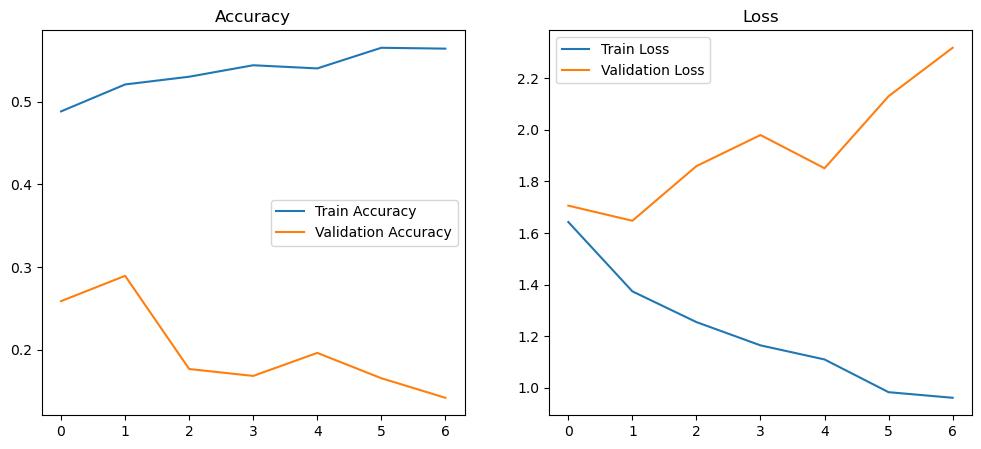

In [3]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Dataset path
dataset = "C:/Users/HP/Downloads/archive (6)/data"

# ImageDataGenerator for training & validation
datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values
    validation_split=0.2 # 80% training, 20% validation
)

train_data = datagen.flow_from_directory(
    dataset,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # multiple classes
    subset='training',
    color_mode='rgb'           # RGB color images
)

test_data = datagen.flow_from_directory(
    dataset,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'
)

# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # match number of classes
])
# Compile model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
checkpoint = ModelCheckpoint(
    "best_cnn_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    mode='max',
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)
# Train model with callbacks
history = cnn_model.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[checkpoint, early_stop, reduce_lr]
)
# Plot accuracy & loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()